Radiation Induced Segregation
=============================
Introduction
------------
The interdiffusion model has been modified in order to reproduce effects of lattice transport assisted by point defects far from equilibrium conditions.

For this purpose the individual probabilities of a point defect moving an atom has been computed for *interstitials* and *vacancies*:
* When an I jumps from cell 1 to cell 2 ($I_{1\rightarrow 2}$):
> $$P(Cr_{1\rightarrow 2}) = g_Ix_{1\rightarrow 2}^I + (1-g_I)\frac{x_{1\rightarrow 2}^I+x_{2\rightarrow 1}^I}{2}$$
>
> $$P(Fe_{1\rightarrow 2}) = g_I(1-x_{1\rightarrow 2}^I)+(1-g_I)\left(1-\frac{x_{1\rightarrow 2}^I + x_{2\rightarrow 1}^I}{2}\right) = 1-P(Cr_{1\rightarrow 2})$$
* When an V jumps from cell 1 to cell 2 ($V_{1\rightarrow 2}$):
> $$P(Cr_{2\rightarrow 1})=g_Vx_{2\rightarrow 1}^V + (1-g_V)\frac{x_{1\rightarrow 2}^V + x_{2\rightarrow 1}^V}{2}$$
>
> $$P(Fe_{2\rightarrow 1})=1-P(Cr_{2\rightarrow 1})$$

<font style="font-family:monospace;">MMonCa</font> Simulations 
--------------------------------------------------------------
<font style="text-decoration:underline;">Parameters</font>
* E$_{mix}(x) = 0$
* D$_I(x) = 0.02 * e^{\frac{-0.68}{k_BT}}$
* D$_V(x) = 0.02 * e^{\frac{-0.68}{k_BT}}$
* $\alpha_I(x) = 50 * e^{\frac{-0.1}{k_BT}}$
* $\alpha_V(x) = 50 * e^{\frac{-0.1}{k_BT}}$




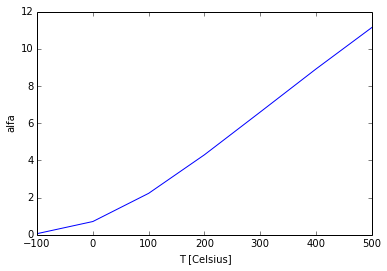

T[C]   alpha
-100   0.06
   0   0.71
 100   2.23
 200   4.30
 300   6.60
 400   8.92
 500   11.15


In [31]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
aP = 50       # Prefactor of alfa factor
aE = 0.1      # Energy of alfa factor
T = [-100, 0, 100, 200, 300, 400, 500]  # Temperature in Kelvin
a = [aP * exp(-aE / (8.6174e-5 * (x + 273.15))) for x in T]

#plt.plot([1. / x for x in T], a)
plt.plot(T, a)
plt.xlabel("T [Celsius]")
plt.ylabel("alfa")
plt.show()
print ("T[C]   alpha\n============")
for i in range(len(a)):
    print("%4d   %4.2f" % (T[i], a[i])) 



### Interstitial Cascade
#### <font style="text-decoration:underline;">T = -100$^o$C</font>
$$\alpha_I=0.06$$
![Interstitial Random Cascade](files/img/RIS/-100I.png)
#### <font style="text-decoration:underline;">T = 0$^o$C</font>
$$\alpha_I=0.71$$
![Interstitial Random Cascade](files/img/RIS/0I.png)
#### <font style="text-decoration:underline;">T = 100$^o$C</font>
$$\alpha_I=2.23$$
![Interstitial Random Cascade](files/img/RIS/100I.png)
#### <font style="text-decoration:underline;">T = 200$^o$C</font>
$$\alpha_I=4.30$$
![Interstitial Random Cascade](files/img/RIS/200I.png)
#### <font style="text-decoration:underline;">T = 500$^o$C</font>
$$\alpha_I=11.15$$
![Interstitial Random Cascade](files/img/RIS/500I.png)
### Vacancy Cascade
#### <font style="text-decoration:underline;">T = -100$^o$C</font>
$$\alpha_V=0.06$$
![Vacancy Random Cascade](files/img/RIS/-100V.png)
#### <font style="text-decoration:underline;">T = 0$^o$C</font>
$$\alpha_V=0.71$$
![Vacancy Random Cascade](files/img/RIS/0V.png)
#### <font style="text-decoration:underline;">T = 100$^o$C</font>
$$\alpha_V=2.23$$
![Vacancy Random Cascade](files/img/RIS/100V.png)
#### <font style="text-decoration:underline;">T = 500$^o$C</font>
$$\alpha_V=11.15$$
![Vacancy Random Cascade](files/img/RIS/500V.png)
### [Cascade] Interstitials and Vacancies
In these simulations Frenkel-Pairs are introduced at a constant rate. And we assure that at the end of the simulation no point-defects (neither interstitials nor vacancies) remain within the simulation domain. We also check that the total number of atoms within the cells remains constatn if no PD are in the simulation domain.

*<font style="text-decoration:underline;">Diffusivity ratios</font>*
$$\alpha_I(x) = 1 * e^{\frac{-0}{k_BT}}$$
$$\alpha_V(x) = 10 * e^{\frac{-0}{k_BT}}$$

*<font style="text-decoration:underline;">Interactions disabled</font>*
$$ I+V \rightarrow 0 $$
$$ I+I \leftrightarrow I_2 $$
$$ V+V \leftrightarrow V_2 $$

![Electron Cascade](files/img/RIS/IandV.png)

### [Cascade] Interstitials and Vacancies + <111>
As in the previous one, FP's are inserted randomly at a constante rate, but in this case an initial and inmobile <111> of size 50 is introduced at the center of the simulation domain. This defect is going to act as a sink of point defects.

*<font style="text-decoration:underline;">Interactions disabled</font>*
$$ I+V \rightarrow 0 $$
$$ I+I \leftrightarrow I_2 $$
$$ V+V \leftrightarrow V_2 $$

![Electron Cascade](files/img/RIS/IandV_111.png)


The interface Problem
---------------------
With the previous implementation, long term simulations lead to the fully depletion or overfilling of the surface cells making at that point the simulation unphysical since a new layer of material should be removed or created. First approach was to consider the creation/depletion by changing the material of the surface cells from gas to material and viceversa.

The level of complexity of this approach could be not necessary for the study of the precipitation at grain boundaries.

[![Video Surface](http://img.youtube.com/vi/7c6jfxfnd44/0.jpg)](https://youtu.be/7c6jfxfnd44)

A simplified model was discussed and presented by P. Castrillo in the personal comunication: *Simplified handling of the emission and capture of defects at the surface*, [3/Jul/15]. This method consists in increase/decrease de number of atoms in a cell when an interstitial/vacancy is created mantaining constant the concentration of that cell and keep track of the artificially created atoms.

The way of increase the number of atoms keeping the same concentration is to create a Cr atom with a probability $X = \frac{n_{Cr}}{n_{Fe} + n_{Cr}}$ or a Fe atom with a probability of $1 - X$ when an intestitial is created. Analogously when the interstitial is captures or the vacancy is emitted/captured.

* The simulations with this approeach can reach long annealing times without problems.
* The stochastic method for maintaing the concentration constant is not strong enought; the small variations from the initial configurations can affect artificially to the concentrations in the defect source/sinks.

<img src="files/img/RIS/Surface_Problem_I.jpeg" alt="Surface Problem" height="300" width="640"> 

### Novy simulations - Overall concentration evolution of the system

Differences between disabling [$\Delta$Cr$\sim 4\%$] or not [$\Delta$Cr$\sim 2\%$] at 800 h of simulation remains unexplained.

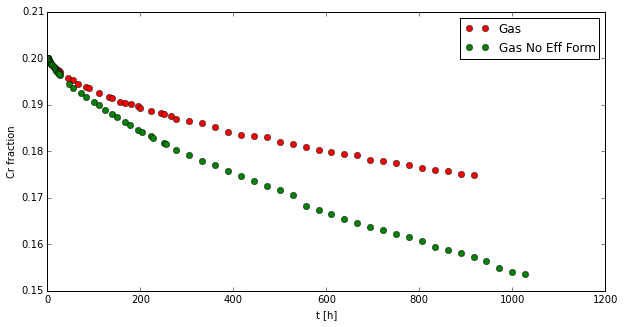

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 5.0)

Novy_Gas = loadtxt("/media/hd/Simulations/Novy/Jul_Gas/concs.dat")
Novy_Gas2 = loadtxt("/media/hd/Simulations/Novy/Jul_Gas_NoForm/concs.dat")

plt.plot([x / 3600. for x in Novy_Gas[:, 0]], Novy_Gas[:, 1], 'ro', label="Gas")
plt.plot([x / 3600. for x in Novy_Gas2[:, 0]], Novy_Gas2[:, 1], 'go', label="Gas No Eff Form")
plt.xlabel("t [h]")
plt.ylabel("Cr fraction")
plt.legend()
plt.show()